#

In [1]:
%pip install pandas matplotlib numpy lets_plot


  Using cached lets_plot-4.5.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pypng-0.20220715.0-py3-none-any.whl.metadata (13 kB)
  Using cached palettable-3.3.3-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached lets_plot-4.5.1-cp312-cp312-win_amd64.whl (3.1 MB)
Using cached palettable-3.3.3-py2.py3-none-any.whl (332 kB)
Using cached pypng-0.20220715.0-py3-none-any.whl (58 kB)
Note: you may need to restart the kernel to use updated packages.

In [19]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

from lets_plot import *
LetsPlot.setup_html(no_js=True)
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

In [20]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [ ]:
1.Why have researchers chosen this particular measure over other measures (such as absolute temperature)?

Temperature anomalies indicate how much warmer or colder it is than
normal for a particular place and time. For the GISS analysis, normal
always means the average over the 30-year period 1951-1980 for that
place and time of year. This base period is specific to GISS, not
universal. But note that trends do not depend on the choice of the base
period: If the absolute temperature at a specific location is 2 degrees
higher than a year ago, so is the corresponding temperature anomaly, no
matter what base period is selected, since the normal temperature used
as base point (which is subtracted from the absolute temperature to get
the anomaly) is the same for both years.

Note that regional mean anomalies (in particular global anomalies) are
not computed from the current absolute mean and the 1951-80 mean for
that region, but from station temperature anomalies. Finding absolute
regional means encounters significant difficulties that create large
uncertainties. This is why the GISS analysis deals with anomalies rather
than absolute temperatures. For a more detailed discussion of that
topic, please see “The Elusive Absolute Temperature”.

In [21]:
df.head()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     144 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.7 KB

In [23]:
df = df.set_index("Year")
df.head()

In [24]:
df.tail()

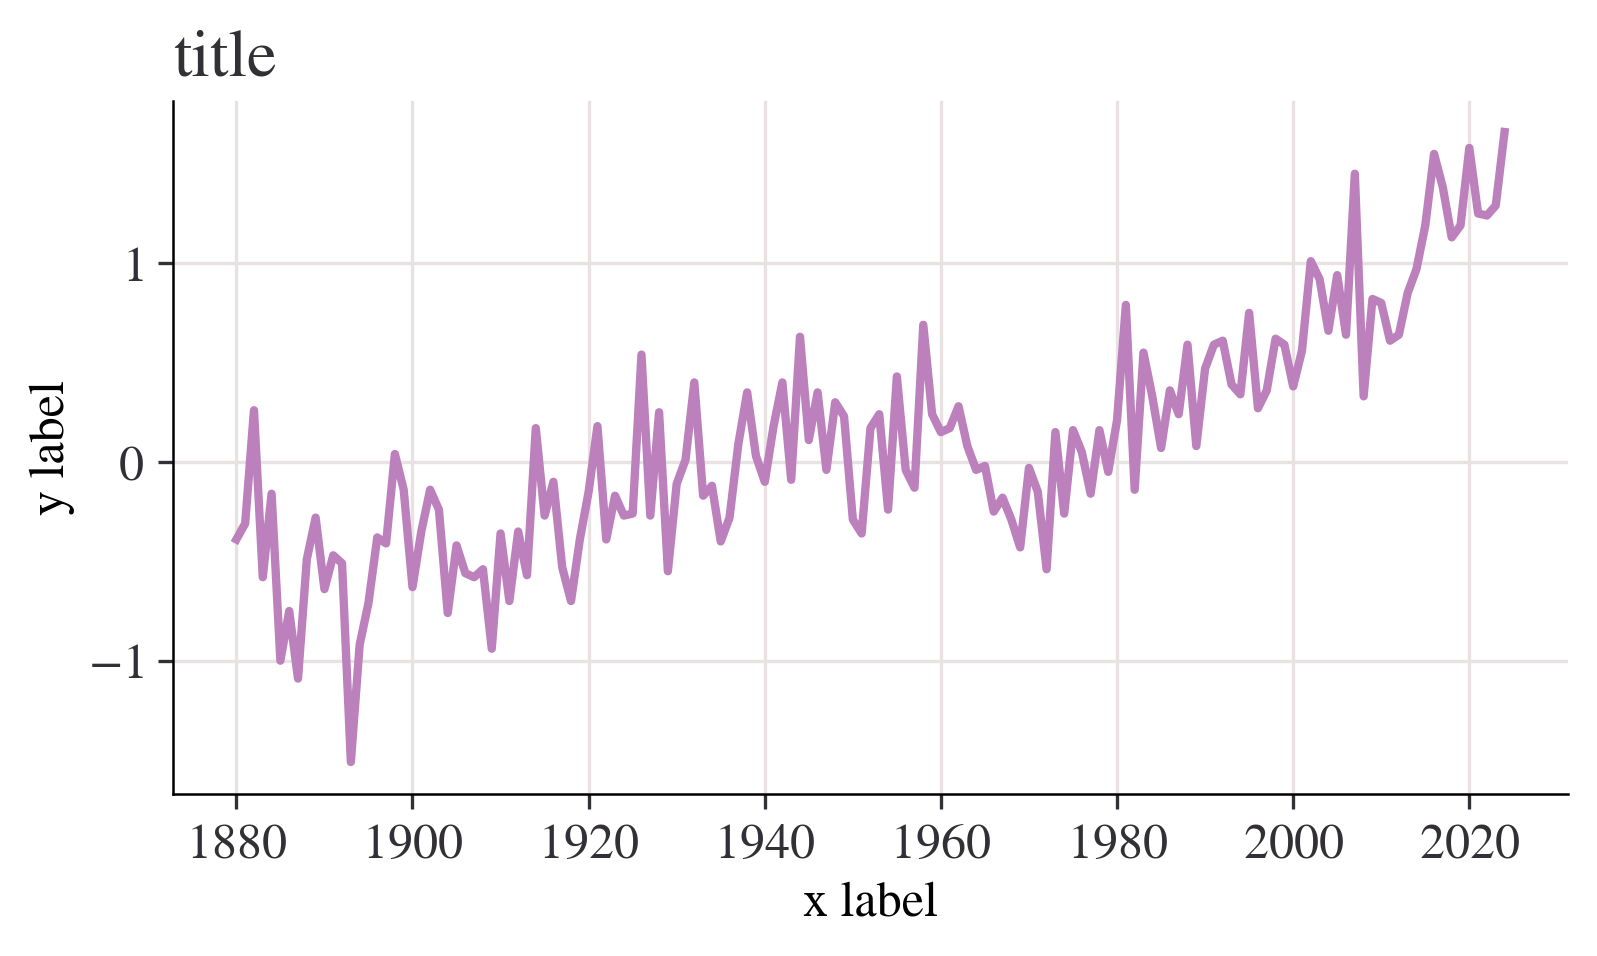

In [25]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

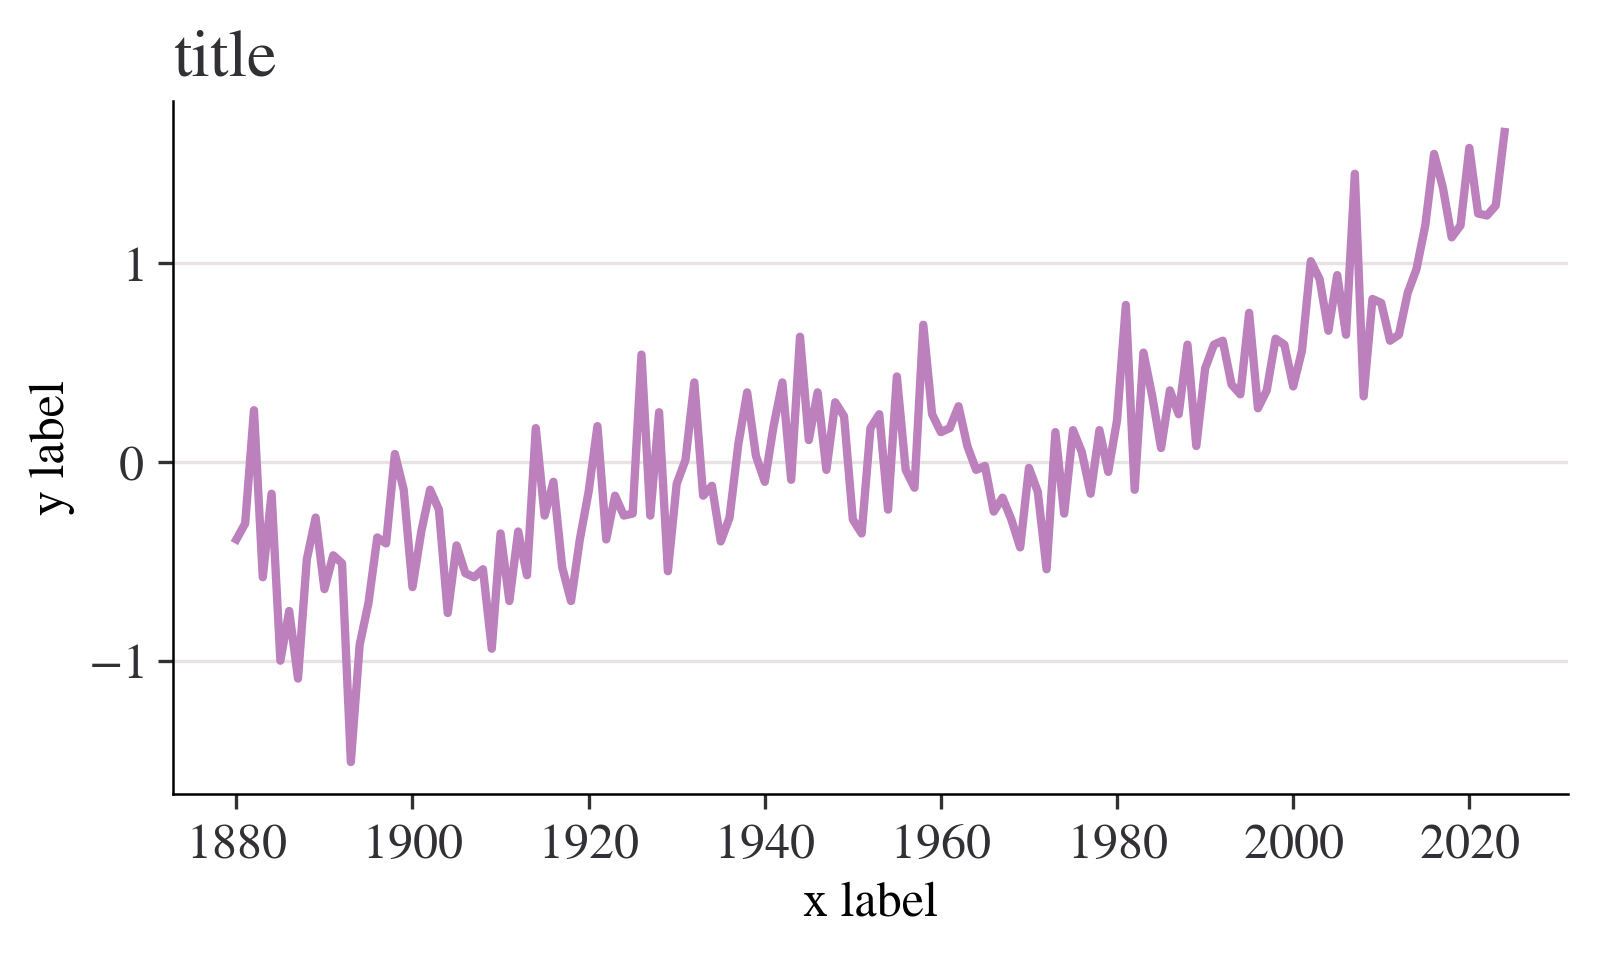

In [26]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

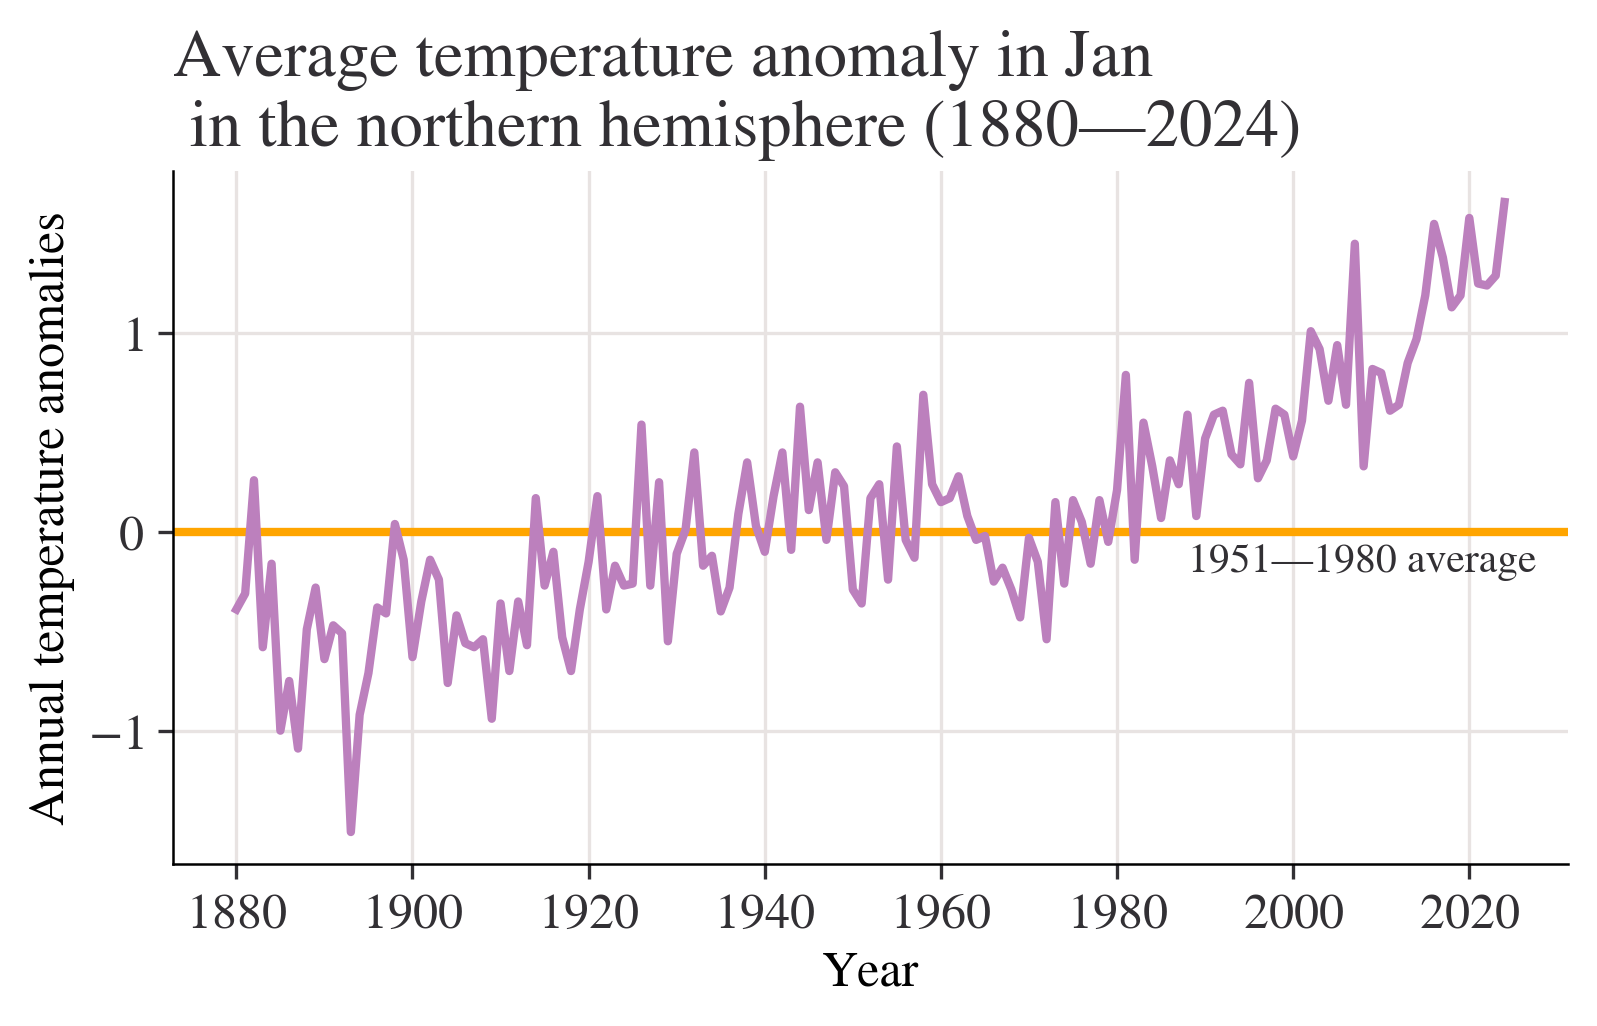

In [27]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

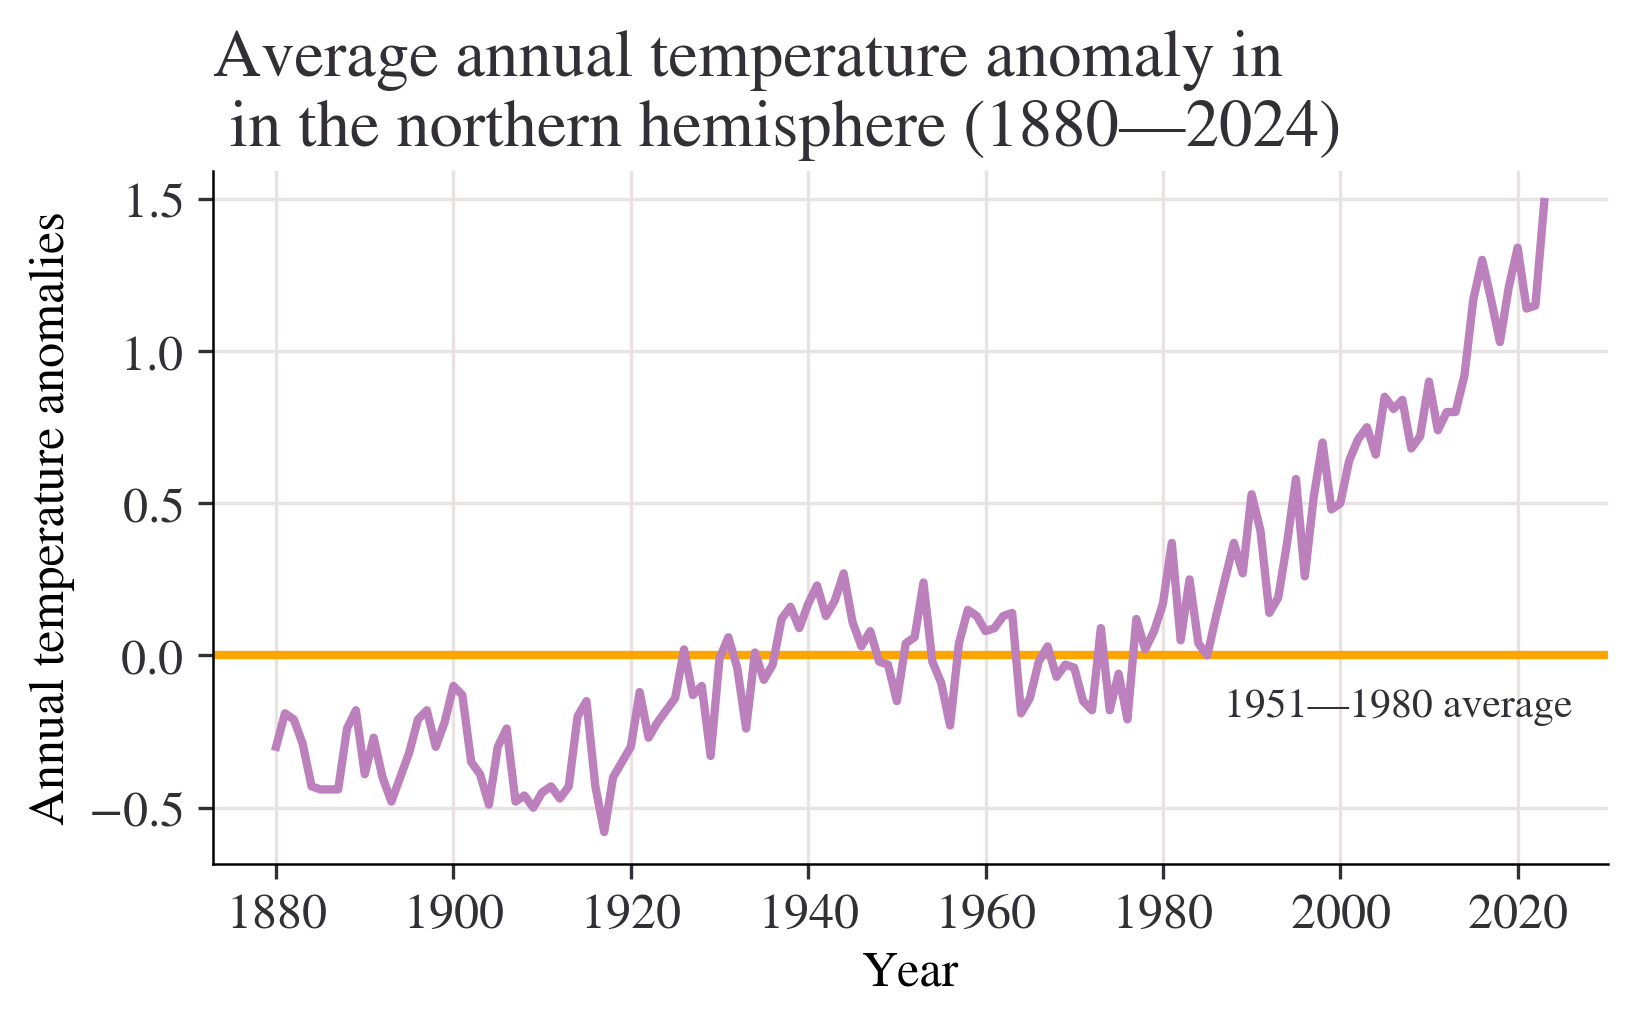

In [28]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

In [29]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [30]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.26
1881  Jun   -0.34
      Jul    0.09
dtype: float64

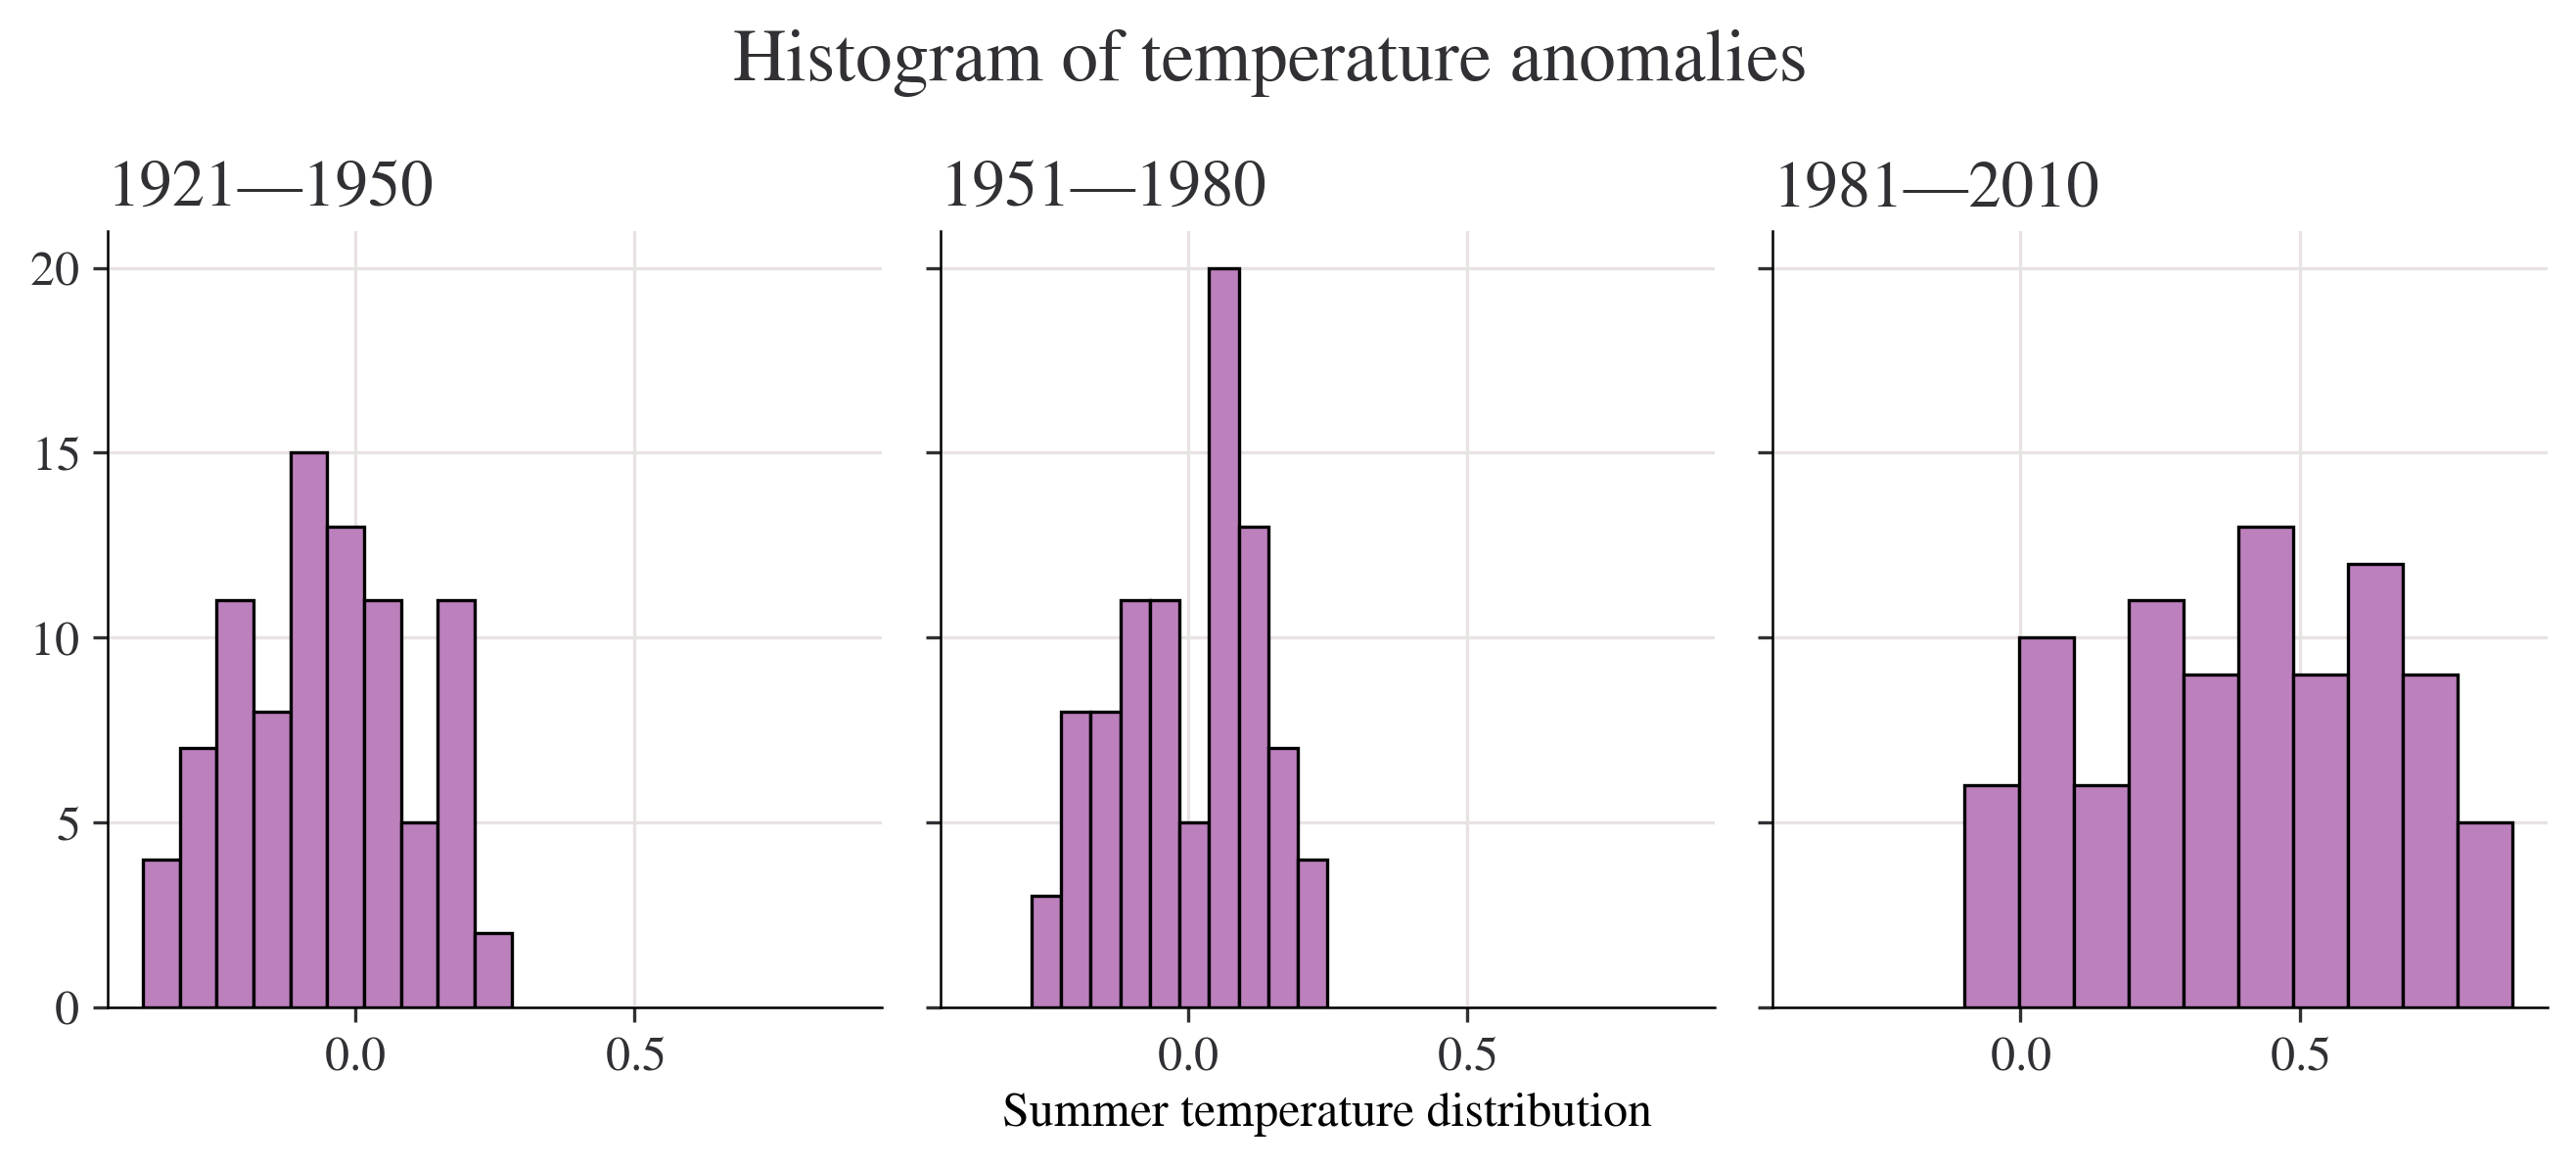

In [31]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

In [32]:
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

360 rows × 3 columns

In [33]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1

In [34]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

In [35]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%

In [36]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%

In [37]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

In [38]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The provided callable <function mean at 0x00000240F30980E0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\1563140002.py:1: FutureWarning: The provided callable <function var at 0x00000240F3098360> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will

In [40]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

<path d="M20.292512015615102 209.58556149732618 L20.292512015615102 209.58556149732618 L23.110916462228488 191.35655866624722 L25.929320908841873 206.70729789241898 L28.74772535545435 213.42324630386912 L31.566129802067735 241.24646115130543 L34.38453424868112 232.6116703365838 L37.202938695294506 235.48993394149102 L40.02134314190789 225.89572192513367 L42.83974758852037 223.01745832022647 L45.65815203513375 187.51887385970429 L48.47655648174714 224.93630072349794 L51.294960928360524 212.4638251022334 L54.11336537497391 233.57109153821955 L56.931769821586386 224.93630072349794 L59.75017426819977 223.9768795218622 L62.56857871481316 223.01745832022647 L65.38698316142654 231.65224913494808 L68.20538760803993 201.9101918842403 L71.0237920546524 234.53051273985528 L73.84219650126579 224.93630072349794 L76.66060094787917 194.23482227115443 L79.47900539449256 182.7217678515256 L82.29740984110595 227.81456432840514 L85.11581428771842 224.93630072349794 L87.93421873433181 235.48993394149102 L90.75262318094519 222.05803711859073 L93.57102762755858 203.82903428751177 L96.38943207417196 233.57109153821955 L99.20783652078444 238.36819754639822 L102.02624096739783 248.9218307643913 L104.84464541401121 229.7334067316766 L107.6630498606246 240.2870399496697 L110.48145430723798 219.17977351368353 L113.29985875385046 239.32761874803396 L116.11826320046384 221.098615916955 L118.93666764707723 197.11308587606163 L121.75507209369061 226.8551431267694 L124.573476540304 258.51604278074865 L127.39188098691648 233.57109153821955 L130.21028543352986 223.9768795218622 L133.02868988014325 203.82903428751177 L135.84709432675663 207.6667190940547 L138.66549877337002 204.7884554891475 L141.4839032199825 232.6116703365838 L144.30230766659588 199.99134948096884 L147.12071211320927 209.58556149732618 L149.93911655982265 189.43771626297575 L152.75752100643604 218.2203523120478 L155.5759254530485 212.4638251022334 L158.3943298996619 215.3420887071406 L161.21273434627528 197.11308587606163 L164.03113879288867 201.9101918842403 L166.84954323950205 196.1536646744259 L169.66794768611544 212.4638251022334 L172.48635213272792 204.7884554891475 L175.3047565793413 208.62614029569045 L178.1231610259547 195.19424347279016 L180.94156547256807 196.1536646744259 L183.75996991918146 168.3304498269896 L186.57837436579393 199.99134948096884 L189.39677881240732 175.04639823843974 L192.2151832590207 175.04639823843974 L195.0335877056341 181.76234664988988 L197.85199215224748 173.12755583516827 L200.67039659885995 166.41160742371812 L203.48880104547334 175.04639823843974 L206.30720549208672 175.04639823843974 L209.1256099387001 172.16813463353253 L211.9440143853135 194.23482227115443 L214.76241883192597 189.43771626297575 L217.58082327853936 197.11308587606163 L220.39922772515274 188.47829506134002 L223.21763217176613 186.55945265806855 L226.0360366183795 161.61450141553945 L228.854441064992 198.07250707769737 L231.67284551160537 216.30150990877632 L234.49124995821876 215.3420887071406 L237.30965440483214 198.07250707769737 L240.12805885144553 180.80292544825414 L242.946463298058 171.2087134318968 L245.7648677446714 205.74787669078324 L248.58327219128478 176.9652406417112 L251.40167663789816 173.12755583516827 L254.22008108451155 194.23482227115443 L257.038485531124 213.42324630386912 L259.8568899777374 205.74787669078324 L262.6752944243508 199.0319282793331 L265.4936988709642 175.04639823843974 L268.31210331757757 177.92466184334694 L271.13050776419004 192.31597986788296 L273.9489122108034 193.2754010695187 L276.7673166574168 209.58556149732618 L279.5857211040302 199.0319282793331 L282.4041255506436 171.2087134318968 L285.22252999725606 199.0319282793331 L288.04093444386945 186.55945265806855 L290.85933889048283 207.6667190940547 L293.6777433370962 166.41160742371812 L296.4961477837096 183.68118905316135 L299.314552230323 189.43771626297575 L302.13295667693546 175.04639823843974 L304.95136112354885 151.06086819754637 L307.76976557016224 180.80292544825414 L310.5881700167756 173

In [45]:
df_co2 = pd.read_csv("D:\Yang Fan\data\data2(1).csv")
df_co2.head()

<>:1: SyntaxWarning: invalid escape sequence '\Y'
<>:1: SyntaxWarning: invalid escape sequence '\Y'
C:\Users\HP\AppData\Local\Temp\ipykernel_19472\2948700116.py:1: SyntaxWarning: invalid escape sequence '\Y'
  df_co2 = pd.read_csv("D:\Yang Fan\data\data2(1).csv")

In [46]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

In [47]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

In [48]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

-0.2 
 
 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 
 
 320 
 
 
 
 
 
 
 340 
 
 
 
 
 
 
 360 
 
 
 
 
 
 
 380 
 
 
 
 
 
 
 400 
 
 
 
 
 
 
 
 
 Scatterplot of temperature anomalies vs carbon dioxide emissions 
 
 
 
 
 Carbon dioxide levels (trend, mole fraction) 
 
 
 
 
 Temperature anomaly (degrees Celsius)

In [49]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

In [50]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

<path d="M24.04475878746598 251.1404958677686 L24.04475878746598 251.1404958677686 L32.19552447813294 231.24380165289259 L40.3462901687999 222.40082644628103 L48.497055859465036 222.40082644628103 L56.647821550131994 290.93388429752065 L64.79858724079895 271.03719008264466 L72.94935293146591 282.0909090909091 L81.10011862213105 306.40909090909093 L89.25088431279801 248.92975206611573 L97.40165000346497 275.4586776859504 L105.5524156941301 271.03719008264466 L113.70318138479706 271.03719008264466 L121.85394707546402 257.7727272727273 L130.00471276612916 293.1446280991736 L138.15547845679612 284.301652892562 L146.30624414746308 226.8223140495868 L154.45700983812822 301.9876033057851 L162.60777552879517 279.8801652892562 L170.75854121946213 306.40909090909093 L178.9093069101291 213.55785123966945 L187.06007260079423 293.1446280991736 L195.2108382914612 246.71900826446281 L203.36160398212814 220.19008264462812 L211.51236967279328 200.2933884297521 L219.66313536346024 259.9834710743802 L227.8139010541272 237.87603305785126 L235.96466674479234 242.29752066115705 L244.1154324354593 262.1942148760331 L252.26619812612626 231.24380165289259 L260.4169638167932 226.8223140495868 L268.56772950745835 173.76446280991738 L276.7184951981253 209.13636363636365 L284.86926088879227 156.07851239669424 L293.0200265794574 158.28925619834715 L301.17079227012437 253.3512396694215 L309.3215579607913 213.55785123966945 L317.47232365145646 171.5537190082645 L325.6230893421234 151.65702479338847 L333.7738550327904 206.92561983471077 L341.9246207234555 153.86776859504135 L350.0753864141225 103.02066115702485 L358.22615210478943 187.02892561983472 L366.3769177954564 164.92148760330582 L374.52768348612153 149.44628099173556 L382.6784491767885 111.86363636363637 L390.82921486745545 142.8140495867769 L398.9799805581206 160.50000000000003 L407.13074624878755 89.75619834710747 L415.2815119394545 85.33471074380168 L423.43227763011964 118.49586776859508 L431.5830433207866 127.33884297520666 L439.73380901145356 116.28512396694217 L447.8845747021205 78.70247933884303 L456.03534039278566 94.17768595041326 L464.1861060834508 56.595041322314074 L472.3368717741196 91.96694214876035 L480.4876374647847 85.33471074380168 L488.6384031554535 27.85537190082647 L496.7891688461186 14.590909090909122 L504.93993453678377 56.595041322314074 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year

In [51]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

<path d="M17.13566787837408 251.1404958677686 L17.13566787837408 251.1404958677686 L22.944368854094137 231.24380165289259 L28.753069829816013 222.40082644628103 L34.56177080553607 222.40082644628103 L40.37047178125613 290.93388429752065 L46.179172756976186 271.03719008264466 L51.987873732696244 282.0909090909091 L57.7965747084163 306.40909090909093 L63.60527568413636 248.92975206611573 L69.41397665985824 275.4586776859504 L75.2226776355783 271.03719008264466 L81.03137861129835 271.03719008264466 L86.84007958701841 257.7727272727273 L92.64878056273847 293.1446280991736 L98.45748153845852 284.301652892562 L104.2661825141804 226.8223140495868 L110.07488348990046 301.9876033057851 L115.88358446562052 279.8801652892562 L121.69228544134057 306.40909090909093 L127.50098641706063 213.55785123966945 L133.3096873927807 293.1446280991736 L139.11838836850075 246.71900826446281 L144.92708934422262 220.19008264462812 L150.73579031994268 200.2933884297521 L156.54449129566274 259.9834710743802 L162.3531922713828 237.87603305785126 L168.16189324710285 242.29752066115705 L173.9705942228229 262.1942148760331 L179.77929519854297 231.24380165289259 L185.58799617426484 226.8223140495868 L191.3966971499849 173.76446280991738 L197.20539812570496 209.13636363636365 L203.01409910142502 156.07851239669424 L208.82280007714508 158.28925619834715 L214.63150105286513 253.3512396694215 L220.440202028587 213.55785123966945 L226.24890300430707 171.5537190082645 L232.05760398002712 151.65702479338847 L237.86630495574718 206.92561983471077 L243.67500593146724 153.86776859504135 L249.4837069071873 103.02066115702485 L255.29240788290736 187.02892561983472 L261.10110885862923 164.92148760330582 L266.9098098343493 149.44628099173556 L272.71851081006935 111.86363636363637 L278.5272117857894 142.8140495867769 L284.33591276150946 160.50000000000003 L290.1446137372295 89.75619834710747 L295.9533147129514 85.33471074380168 L301.76201568867145 118.49586776859508 L307.5707166643915 127.33884297520666 L313.37941764011157 116.28512396694217 L319.1881186158316 78.70247933884303 L324.9968195915517 94.17768595041326 L330.80552056727174 56.595041322314074 L336.6142215429936 91.96694214876035 L342.4229225187137 85.33471074380168 L348.23162349443373 27.85537190082647 L354.0403244701538 14.590909090909122 L359.84902544587385 56.595041322314074 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M17.366281074255312 306.4090909090909 L17.366281074255312 306.4090909090909 L23.253156014679917 303.0032722513089 L29.14003095510634 298.4197405997144 L35.026905895530945 298.03777962874824 L40.91378083595555 295.5232032365541 L46.80065577638197 292.69032603522123 L52.68753071680658 291.00333174678724 L58.57440565723118 291.1306520704427 L64.4612805976576 285.17842693955265 L70.34815553808221 283.8415635411709 L76.23503047850681 279.83097334602576 L82.12190541893324 275.279271775345 L88.00878035935784 272.4463945740124 L93.89565529978245 269.64534745359356 L99.78253024020887 267.99018324607323 L105.66940518063348 258.3774988100904 L111.55628012105808 258.3774988100904 L117.4431550614845 254.36690861494526 L123.33003000190911 252.93455497382206 L129.2169049423337 246.09108757734407 L135.10377988275832 240.39350309376505 L140.99065482318474 236.41474297953368 L146.87752976360935 230.0487267967635 L152.76440470403395 226.13362684435992 L158.65127964446037 222.05937648738677 L164.53815458488498 216.32996192289397 L170.42502952530958 212.00107091861014 L176.311904465736 207.44936934792963 L182.19877